In [1]:
import time
import matplotlib.pyplot as plt
from astropy.time import Time, TimeDelta
from astropy import units as u
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

from poliastro.bodies import Earth, Moon
from poliastro.ephem import Ephem
from poliastro.frames import Planes
from poliastro.plotting import OrbitPlotter3D, OrbitPlotter2D, StaticOrbitPlotter
from poliastro.util import norm, time_range
from poliastro.plotting.misc import plot_solar_system
from poliastro.twobody import Orbit

daysOfPlot=45
epoch_launch = Time("2021-12-26 00:00:00", scale="tdb")
epoch_end = Time("2022-01-24 00:00:00", scale="tdb")
timenow = Time.now()
epoch_current = Time(timenow, scale="tdb")
timeArray = [epoch_launch + TimeDelta(i * u.day) for i in range(daysOfPlot)]

In [2]:
epochs= time_range(epoch_launch, end=epoch_end)

jwst = Ephem.from_horizons(
    "James Webb Space Telescope",
    epochs=epochs,
    attractor=Earth,
    plane=Planes.EARTH_EQUATOR,
    id_type="majorbody",
)

moon = Ephem.from_body(Moon, epochs, attractor=Earth)

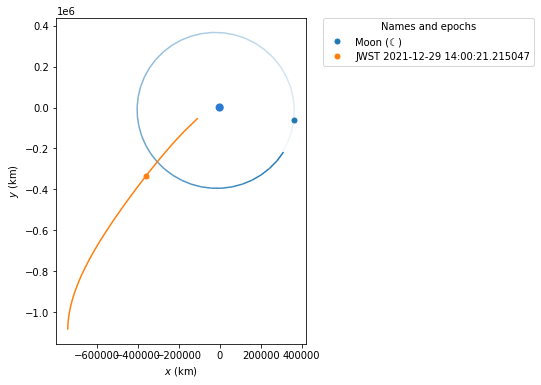

In [3]:
plotter = StaticOrbitPlotter()
plotter.set_attractor(Earth)
plotter.set_body_frame(Moon)
plotter.plot_ephem(moon, timenow, label=Moon, trail=True)
plotter.plot_ephem(jwst, timenow, label=f'JWST {timenow}')
plt.savefig('plots/jwst.png')

In [4]:
## Create plot for all days to create animation
# for t in timeArray:
#     plotter = StaticOrbitPlotter()
#     plotter.set_attractor(Earth)
#     plotter.set_body_frame(Moon)
#     plotter.plot_ephem(moon, t, label=Moon, trail=True)
#     plotter.plot_ephem(jwst, t, label=f'JWST {t}')
#     plt.savefig(f'plots/jwst-{t}.png')